In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,6)
sns.set(font_scale=1.3)

In [38]:
df = pd.read_excel('./SLR_transformers_EMR_analysis.xlsx')
df['year'] = df['year'].astype(str)

In [25]:
def plot_multiple_string_col(df, col_name, col_rename):
    nem_col = pd.DataFrame({col_rename:df[col_name].str.split('\n').explode().apply(lambda x: x.strip()).reset_index(drop=True)})
    nem_col = nem_col[nem_col[col_rename] != '']
    ax = sns.countplot(data=nem_col, x=col_rename, order=nem_col[col_rename].value_counts().index)
    ax.bar_label(ax.containers[0])
    ticks = plt.xticks(rotation=90)
    
def plot_multiple_string_col_original_order(df, col_name, col_rename):
    nem_col = pd.DataFrame({col_rename:df[col_name].str.split('\n').explode().apply(lambda x: x.strip()).reset_index(drop=True)})
    nem_col = nem_col[nem_col[col_rename] != '']
    ax = sns.countplot(data=nem_col, x=col_rename, order=sorted(df[col_name].unique()))
    ax.bar_label(ax.containers[0])
    ticks = plt.xticks(rotation=90)

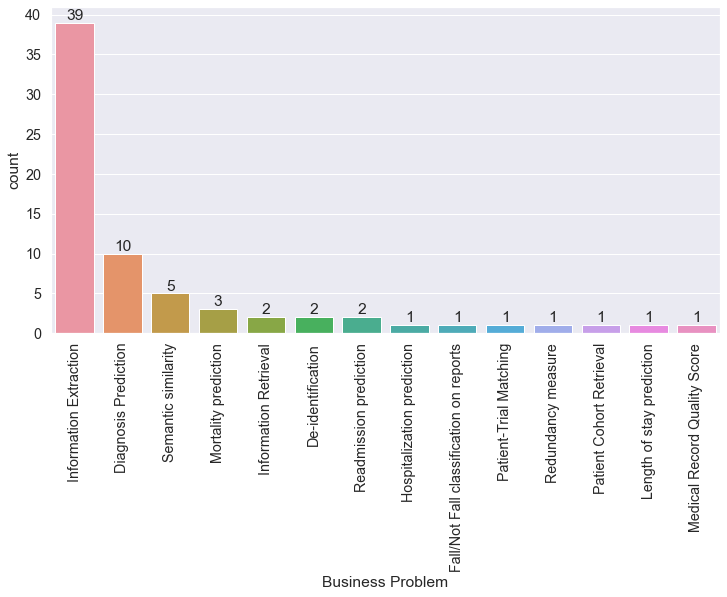

In [21]:
plot_multiple_string_col(df, 'business_problem', 'Business Problem')

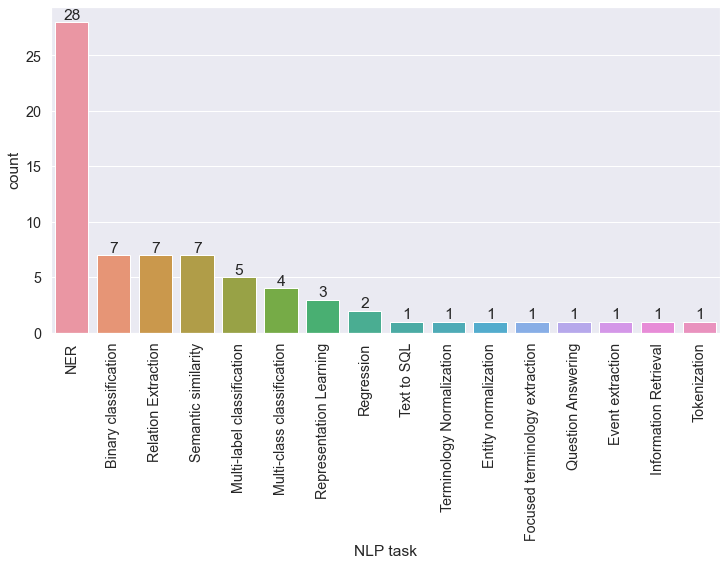

In [22]:
plot_multiple_string_col(df, 'nlp_task', 'NLP task')

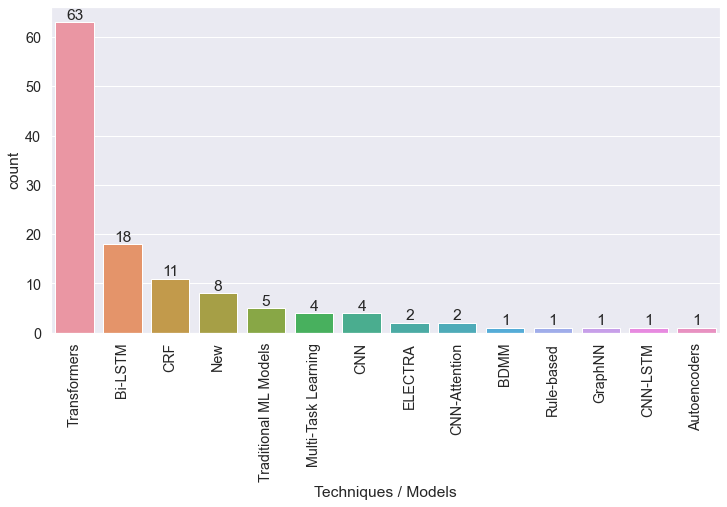

In [23]:
plot_multiple_string_col(df, 'technique_group', 'Techniques / Models')

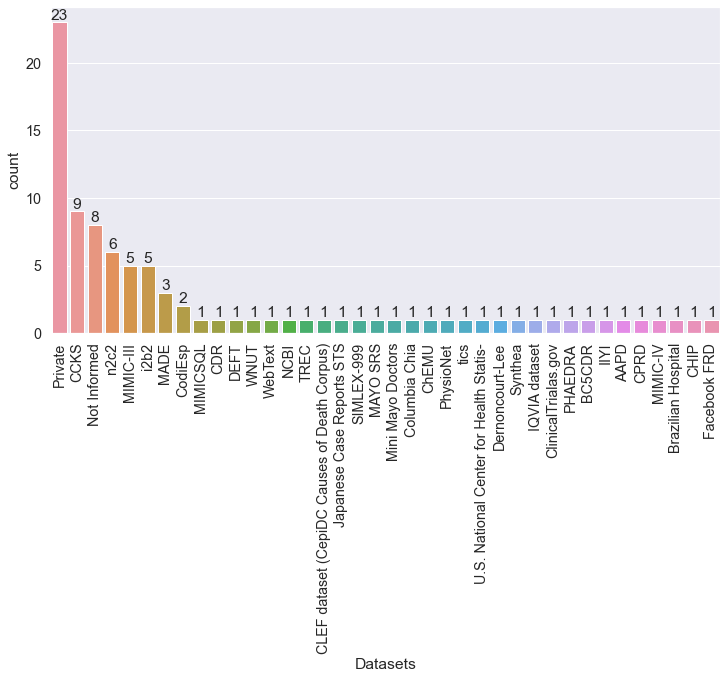

In [24]:
plot_multiple_string_col(df, 'dataset_name', 'Datasets')

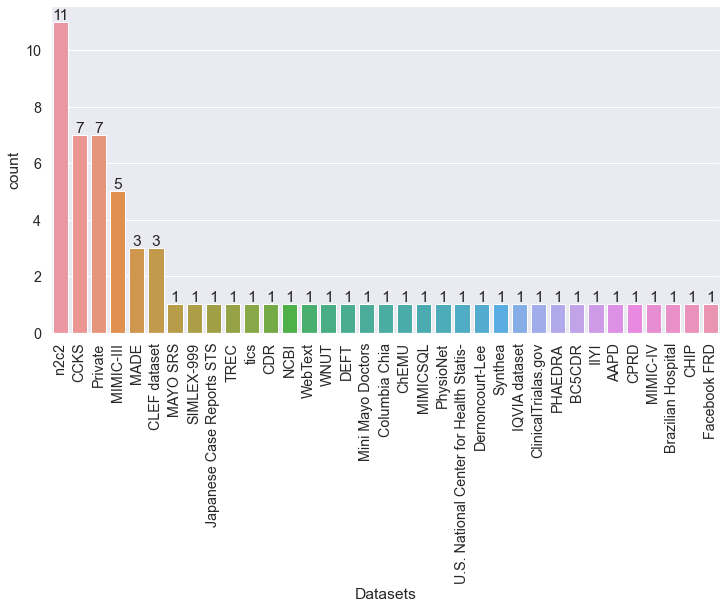

In [44]:
plt.rcParams["figure.figsize"] = (12,6)
df_temp = df[
    (
        (df['public_dataset']!='No')
    )]
plot_multiple_string_col(df_temp, 'dataset_name', 'Datasets')

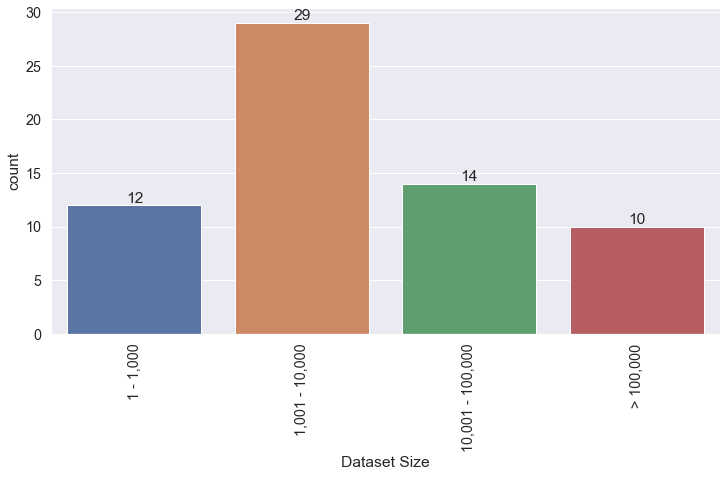

In [26]:
plot_multiple_string_col_original_order(df, 'dataset_size_order', 'Dataset Size')

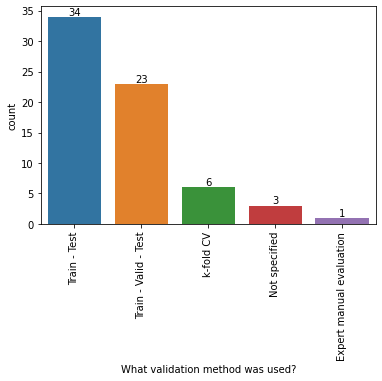

In [9]:
plot_multiple_string_col(df, 'validation_method', 'What validation method was used?')

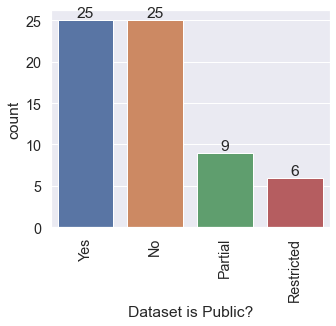

In [31]:
plot_multiple_string_col(df, 'public_dataset', 'Dataset is Public?')

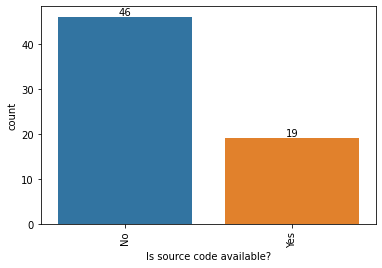

In [11]:
df.loc[df['public_code'] != 'No', 'public_code'] = 'Yes'
plot_multiple_string_col(df, 'public_code', 'Is source code available?')

In [12]:
pd.crosstab(df['public_code'], df['public_dataset'], normalize='all').style.format("{:.0%}")

public_dataset,No,Partial,Restricted,Yes
public_code,,,,
No,35%,9%,6%,20%
Yes,3%,5%,3%,18%


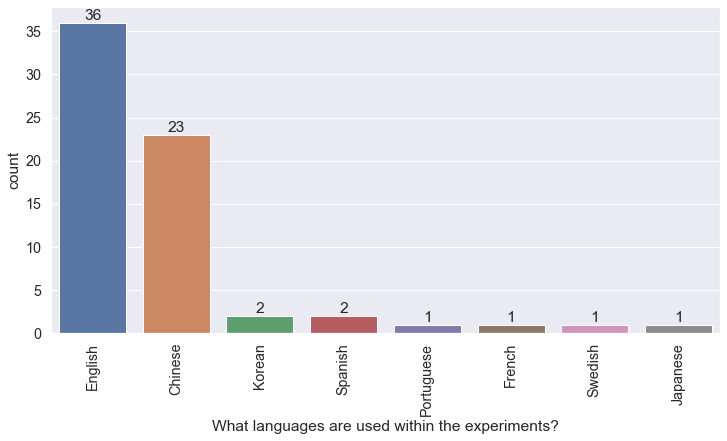

In [27]:
plot_multiple_string_col(df, 'languages', 'What languages are used within the experiments?')

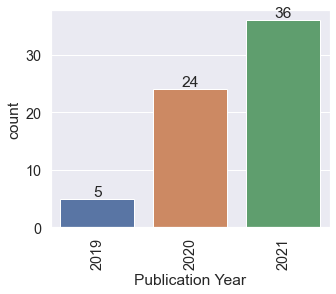

In [28]:
plt.rcParams["figure.figsize"] = (5,4)
plot_multiple_string_col_original_order(df, 'year', 'Publication Year')

In [30]:
pd.crosstab(df['languages'], df['nlp_task'], normalize='all').style.format("{:.0%}")

nlp_task,Binary classification,Entity normalization,Event extraction,Focused terminology extraction,Information Retrieval,Multi-class classification,Multi-class classification Semantic similarity,Multi-label classification,Multi-label classification,Multi-label classification NER,NER,NER Relation Extraction,NER Semantic similarity,Question Answering,Regression,Regression Binary classification,Relation Extraction,Representation Learning,Semantic similarity,Terminology Normalization,Text to SQL,Tokenization
languages,,,,,,,,,,,,,,,,,,,,,,
Chinese,0%,0%,2%,0%,0%,2%,0%,3%,2%,0%,20%,2%,0%,0%,0%,0%,2%,2%,0%,2%,0%,2%
English,8%,2%,0%,0%,2%,2%,2%,0%,2%,0%,12%,2%,2%,2%,2%,2%,6%,3%,6%,0%,2%,0%
English French,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,2%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
English Spanish,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,2%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Japanese,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,2%,0%,0%,0%
Korean,0%,0%,0%,0%,0%,2%,0%,0%,0%,0%,2%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Portuguese,2%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Spanish,0%,0%,0%,0%,0%,0%,0%,0%,0%,2%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Swedish,0%,0%,0%,2%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


In [45]:
pd.crosstab(df['languages'], df['public_dataset'], normalize='all').style.format("{:.0%}")

public_dataset,No,Partial,Restricted,Yes
languages,,,,
Chinese,18%,8%,2%,8%
English,15%,3%,8%,26%
English French,0%,0%,0%,2%
English Spanish,0%,0%,0%,2%
Japanese,0%,2%,0%,0%
Korean,3%,0%,0%,0%
Portuguese,0%,0%,0%,2%
Spanish,0%,2%,0%,0%
Swedish,2%,0%,0%,0%
